In [13]:
## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata_path_df = pd.DataFrame(mouse_metadata)
study_results_path_df = pd.DataFrame(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(study_results_path_df, mouse_metadata_path_df, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count_total = pd.DataFrame({"Mouse Count": [mouse_count]})
mouse_count_total

,Mouse Count
0,249


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

combined_df_dups = combined_df.duplicated()
combined_df_id = np.where(combined_df_dups == True)
dup_mouse = combined_df.iloc[combined_df_id]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_group = clean_df.groupby(clean_df["Drug Regimen"])
tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

tumor_summary_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variation": tumor_var,
                                 "Standard Deviation": tumor_std,
                                 "Standard Error of Mean": tumor_sem})

tumor_summary_df.round(2)


,Mean,Median,Variation,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

regimen_df = clean_df.groupby(clean_df["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

regimen_df.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.37  50.91  42.28  6.50  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0, 0.5, 'Count')

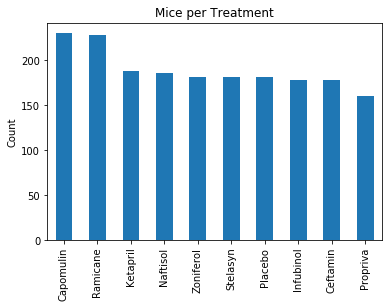

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

pandas_bar = clean_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.title("Mice per Treatment")
plt.ylabel("Count")

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_name = (clean_df["Drug Regimen"].unique())

# clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
# mouse_per_treatment=[]
# for treatment in treatment_name:
#     temp=clean_df.loc[clean_df["Drug Regimen"]==treatment]
#     mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
# mouse_per_treatment
# x= treatment_name
# height = mouse_per_treatment
# plt.bar(x, height)
# plt.xticks(rotation = "vertical")
# plt.show()

pyplot_bar = clean_df["Drug Regimen"].value_counts()
pyplot_bar.plt.bar(treatment_name)
# dont need groupby or for loop

AttributeError: 'Series' object has no attribute 'plt'

In [ ]:
len(combined_df["Mouse ID"].unique())

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.groupby("Sex")["Mouse ID"].nunique().plot(kind="pie", autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")

plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
treatment_name = (clean_df["Sex"].unique())


mouse_per_treatment=[]
for treatment in treatment_name:
    temp=clean_df.loc[clean_df["Sex"]==treatment]
    mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
    
fig = plt.figure()
plt.pie(mouse_per_treatment, labels = treatment_name, autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
select_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
deselcted_treatments = ["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"]
max_time_regimen = clean_df[clean_df["Drug Regimen"] != "Ketapril"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Naftisol"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Placebo"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Propriva"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Stelasyn"]
max_time_regimen = max_time_regimen[max_time_regimen["Drug Regimen"] != "Zoniferol"]

# # Start by getting the last (greatest) timepoint for each mouse
max_time = max_time_regimen.groupby("Mouse ID", as_index=False)["Timepoint"].max()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time = clean_df.merge(max_time)
merge_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [31]:
# Put treatments into a list for for loop (and later for plot labels)

select_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
quantile = []
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# First quartile (Q1) 
for treatment in select_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merge_time.loc[merge_time["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quantile =final_volume.quantile([.25, .5, .75])
    lower_q = quantile[.25]
    upper_q = quantile[.75]
    iqr = upper_q - lower_q
    
upper_q
    
# Q1 = np.median(final_volume[:10]) 
  
# # # Third quartile (Q3) 
# Q3 = np.median(merge_time[10:]) 
  
# # # Interquartile range (IQR) 
# IQR = Q3 - Q1

In [18]:
merge_time.loc[merge_time["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"].quantile([.25, .5, .75])

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# dataframe.boxplot()

## Line and Scatter Plots

C:\Users\Yanwho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


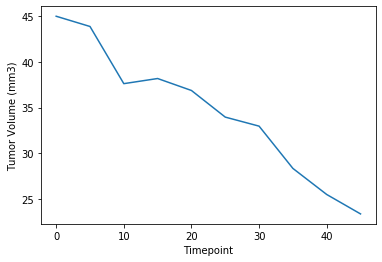

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

random_mouse = clean_df[(clean_df ==  "s185").any(1)]
x = random_mouse["Timepoint"]
y = random_mouse["Tumor Volume (mm3)"]

plt.plot(x,y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
random_mouse

C:\Users\Yanwho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


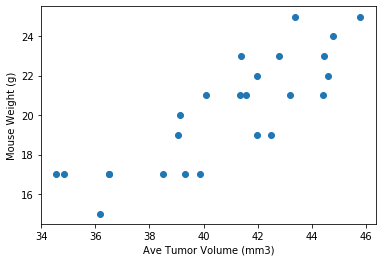

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_df[(clean_df ==  "Capomulin").any(1)]

capomulin_tumor_ave = capomulin.groupby(capomulin["Mouse ID"])[["Tumor Volume (mm3)"]].mean()
capomulin_mouse_weight = capomulin.groupby(capomulin["Mouse ID"])[["Weight (g)"]].mean()

# random_mouse = clean_df[(clean_df ==  "Capomulin").any(1)]

x = capomulin_tumor_ave
y = capomulin_mouse_weight


plt.scatter(x,y,)
plt.xlabel("Ave Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()
capomulin

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
